<a href="https://colab.research.google.com/github/Aniq55/genMarkov/blob/ab%2Fmaster/markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
params = {
   'axes.labelsize': 8,
   'text.fontsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
# rcParams.update(params)

NameError: ignored

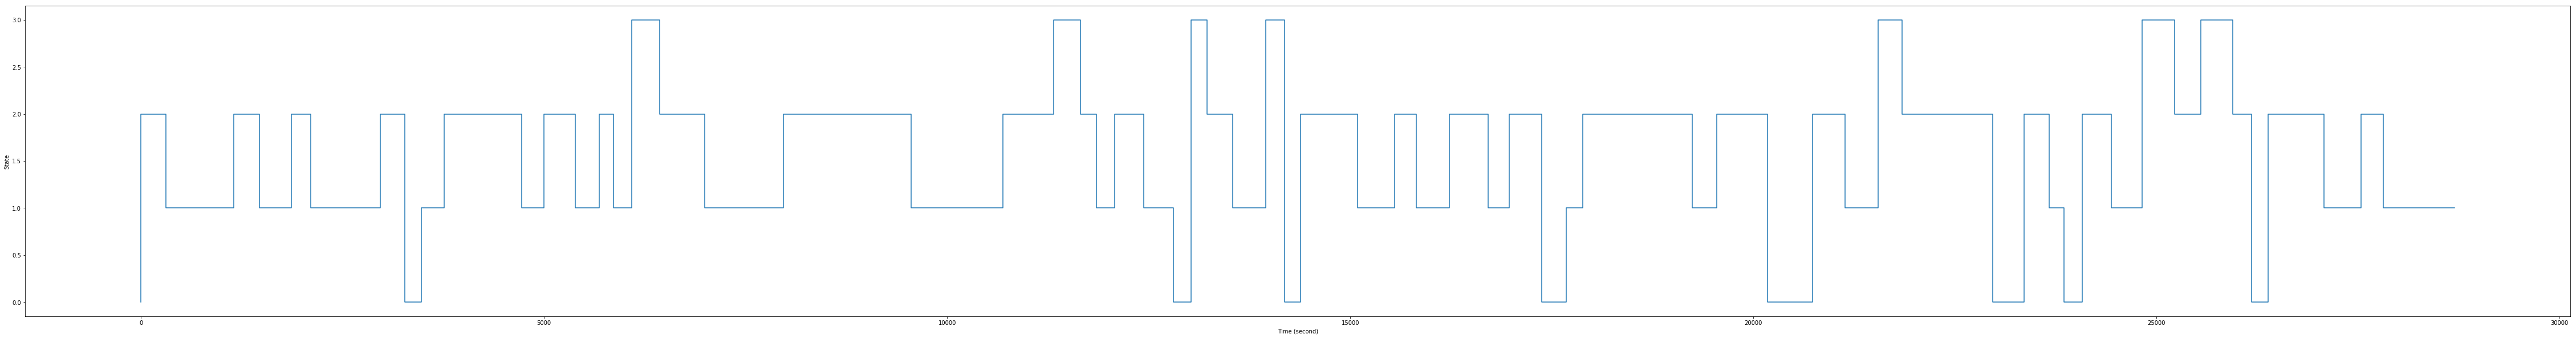

In [14]:
import numpy as np
from markov import *
import matplotlib.pyplot as plt


class PoissonProcess():

    def __init__(self, L, B, W):
        self.Lambda= L
        self.beta= B
        self.omega= W

    def time_variance(self, t):
        return self.Lambda + self.beta*np.sin(self.omega*t)

    def interval(self, t):
        return np.random.poisson(self.time_variance(t))


pp= PoissonProcess(300, 100, 2*np.pi/1200)
mm= MarkovModel(0.5, 0.2, 4)


CHAIN={}
CHAIN['STATE']=[]
CHAIN['TIME']=[]

CHAIN['STATE'].append(0)
CHAIN['TIME'].append(0)

ITERATIONS= 100
for i in range(ITERATIONS):
    CHAIN['STATE'].append(mm.transition())
    CHAIN['TIME'].append(CHAIN['TIME'][-1] + pp.interval(CHAIN['TIME'][-1]))


plt.figure(figsize=(80,10))
plt.step(CHAIN['TIME'], CHAIN['STATE'])
plt.xlabel("Time (second)")
plt.ylabel("State")
plt.show()
